<a href="https://colab.research.google.com/github/mimansha98/colab-work/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Test.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls /content/drive/My\ Drive/preprocess.py

'/content/drive/My Drive/preprocess.py'


In [ ]:
!ls /content/drive/My\ Drive/predictor.py

'/content/drive/My Drive/predictor.py'


In [ ]:
!cat '/content/drive/My Drive/preprocess.py'

# -*- coding: utf-8 -*-
"""
This is preprocess.py....

Created on Mon Apr  8 19:15:12 2019

@author: Quassarian Viper
"""


import numpy as np
import matplotlib.pyplot as plt
import cv2



def borders(here_img, thresh):
    size = here_img.shape
    check = int(115 * size[0] / 600)
    image = here_img[:]
    top, bottom = 0, size[0] - 1
    #plt.imshow(image)
    #plt.show()
    shape = size

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    
    
    shape = image.shape
    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
 

In [ ]:
!cat '/content/drive/My Drive/predictor.py'

# -*- coding: utf-8 -*-
"""
Created on Mon Apr  8 19:15:12 2019

@author: Quassarian Viper
"""
import numpy as np
from keras.models import model_from_json
from keras.models import load_model

def prediction(img):
    # load json and create model
    json_file = open('cnn2\cnn2.json', 'r')
    
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    # load weights into new model
    loaded_model.load_weights("cnn2\cnn2.h5")
    #print("Loaded model from disk")
    
    loaded_model.save('cnn.hdf5')
    loaded_model=load_model('cnn.hdf5')
    
    characters = '०,१,२,३,४,५,६,७,८,९,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ'
    characters = characters.split(',')
    
    x = np.asarray(img, dtype = np.float32).reshape(1, 32, 32, 1) / 255 
    
    output = loaded_model.predict(x)
    output = output.reshape(46)
    predicted = np.argmax(output)
    devanagari_label = characters[predic

In [ ]:
import sys
sys.path.append('/content/drive/My Drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

tf.__version__

'2.3.0'

In [ ]:
S = 32 # imnput shape of our model 

# rescale our images
trainDatagen = ImageDataGenerator(rescale=1./255)

testDatagen = ImageDataGenerator(rescale=
                                 1./255)
# minor image processing
train_set = trainDatagen.flow_from_directory(
        '/content/Train/',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_set = testDatagen.flow_from_directory(
        '/content/Test',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


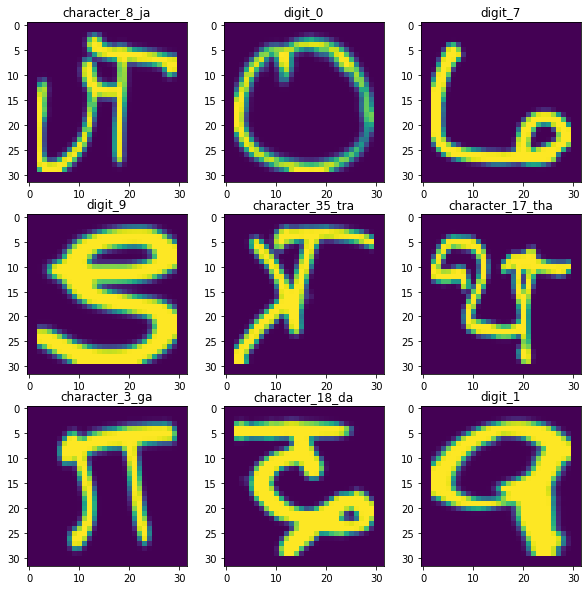

In [ ]:
classes = list(train_set.class_indices.keys())
r=3
c=3
fig = plt.figure(figsize=(10, 10))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = train_set[i][1][i]
    img = train_set[i][0][i]
    plt.title(classes[np.argmax(lbl)])
    plt.imshow(img.reshape(32, 32))
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.models import model_from_json
# from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import preprocess

In [ ]:
import predictor

In [ ]:
#Evaluate the model, 
import time
time1 = time.time()
history = model.fit_generator(train_set, steps_per_epoch=len(train_set),
                           epochs=10,
                           workers = 4,
                           validation_data=test_set,
                           validation_steps=10,
                           verbose = 1)
time2 = time.time()
score = model.evaluate_generator(test_set, steps=1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2444/2444 [==============================] - 284s 116ms/step - loss: 0.7492 - accuracy: 0.7870 - val_loss: 0.1213 - val_accuracy: 0.9625
Epoch 2/10
2444/2444 [==============================] - 275s 113ms/step - loss: 0.2265 - accuracy: 0.9307 - val_loss: 0.0818 - val_accuracy: 0.9812
Epoch 3/10
2444/2444 [==============================] - 277s 113ms/step - loss: 0.1644 - accuracy: 0.9490 - val_loss: 0.0505 - val_accuracy: 0.9750
Epoch 4/10
2444/2444 [==============================] - 268s 110ms/step - loss: 0.1349 - accuracy: 0.9588 - val_loss: 0.0796 - val_accuracy: 0.9750
Epoch 5/10
2444/2444 [==============================] - 266s 109ms/step - loss: 0.1130 - accuracy: 0.9647 - val_loss: 0.0567 - val_accuracy: 0.9812
Epoch 6/10
2444/2444 [==============================] - 265s 108ms/step - loss: 0.0995 - accuracy: 0.9691 - val_loss: 0.0295 - val_accuracy: 0.9875
Epoch 7/10
2444/2444 [==============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


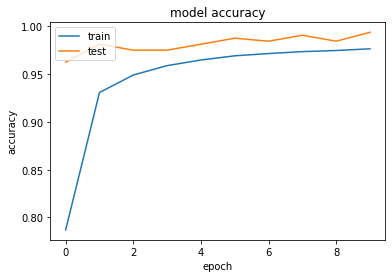

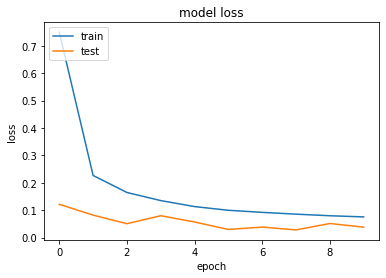

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model


model_json = model.to_json()

with open("dcr.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("dcr.h5")

In [ ]:
# load json and create model
json_file = open('dcr.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dcr.h5")
print("Loaded model from disk")

loaded_model.save('dcr.hdf5')
loaded_model=load_model('dcr.hdf5')

Loaded model from disk


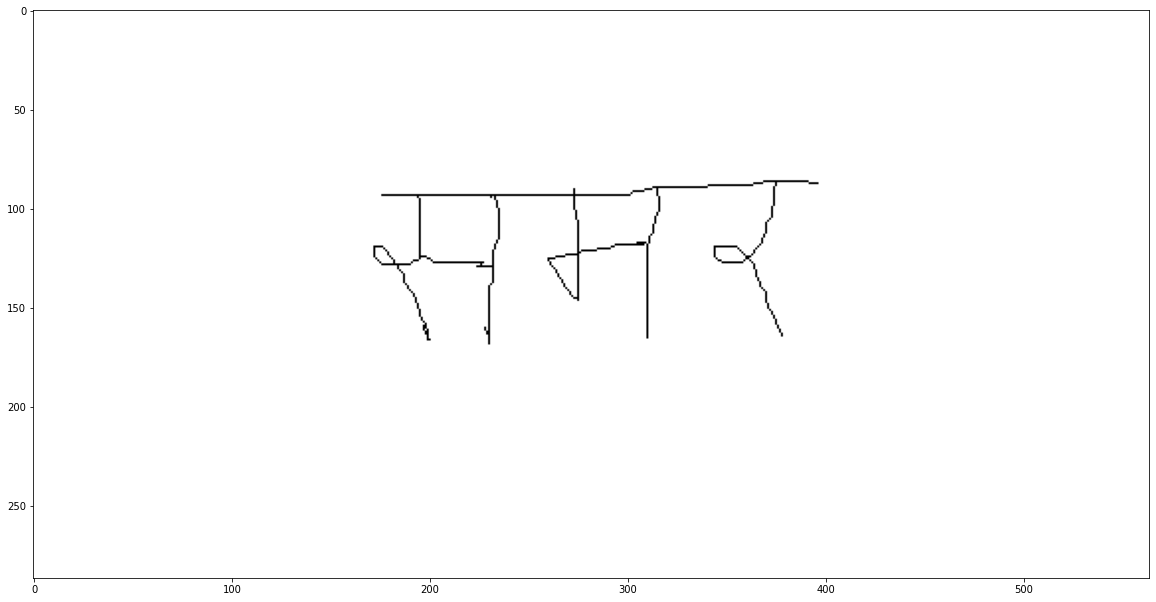

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread("/content/drive/MyDrive/samar.png", 0)

def show(img, figsize=(20, 20)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img, cmap="gray")
    plt.show()
show(img)

In [ ]:
def borders(here_img, thresh, bthresh=0.092):
    shape = here_img.shape
    #check = int(115 * size[0] / 600)
    #check = int(55 * size[0] / 600)
    check= int(bthresh*shape[0])
    image = here_img[:]
    top, bottom = 0, shape[0] - 1
    #plt.imshow(image)
    #plt.show()
    

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    

    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break

    d1 = (top - 2) >= 0 
    d2 = (bottom + 2) < shape[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0
    
    return (top, bottom, b)


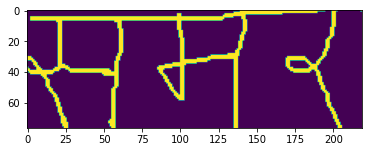

In [ ]:
def preprocess(bgr_img):#gray image   
    blur = cv2.GaussianBlur(bgr_img,(5,5),0)
    ret,th_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #converts black to white and inverse

    rows, cols = th_img.shape
    bg_test = np.array([th_img[i][i] for i in range(5)])
    if bg_test.all() == 0:
        text_color = 255
    else:
        text_color = 0
    
    tb = borders(th_img, text_color)
    lr = borders(th_img.T, text_color)
    dummy = int(np.average((tb[2], lr[2]))) + 2
    template = th_img[tb[0]+dummy:tb[1]-dummy, lr[0]+dummy:lr[1]-dummy]
    
    plt.imshow(template)
    plt.show()
    return (template, tb, lr)
prepimg, tb, lr = preprocess(img)

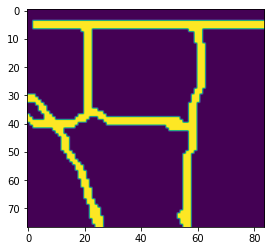

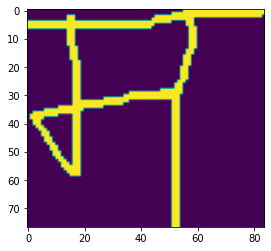

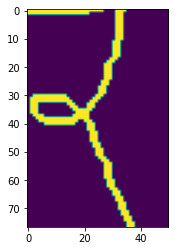

In [ ]:
def segmentation(bordered, thresh=255, min_seg=10, scheck=0.15):
    try:
        shape = bordered.shape
        check = int(scheck * shape[0])
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
            if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)            

        lenkeys = len(bg_keys)-1
        new_keys = [bg_keys[1], bg_keys[-1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)

        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        bounding_boxes = []
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            if segment.shape[0]>=min_seg and segment.shape[1]>=min_seg:
                segmented_templates.append(segment.T)
                bounding_boxes.append((first, key))
            first = key
        
        last_segment = bordered.T[new_keys[-1]:]
        if last_segment.shape[0]>=min_seg and last_segment.shape[1]>=min_seg:
            segmented_templates.append(last_segment.T)
            bounding_boxes.append((new_keys[-1], new_keys[-1]+last_segment.shape[0]))


        return(segmented_templates, bounding_boxes)
    except:
        return [bordered, (0, bordered.shape[1])]
segments=segmentation(prepimg)
for simg in segments[0]:
    plt.imshow(simg)
    plt.show()

In [ ]:
del zip

NameError: ignored

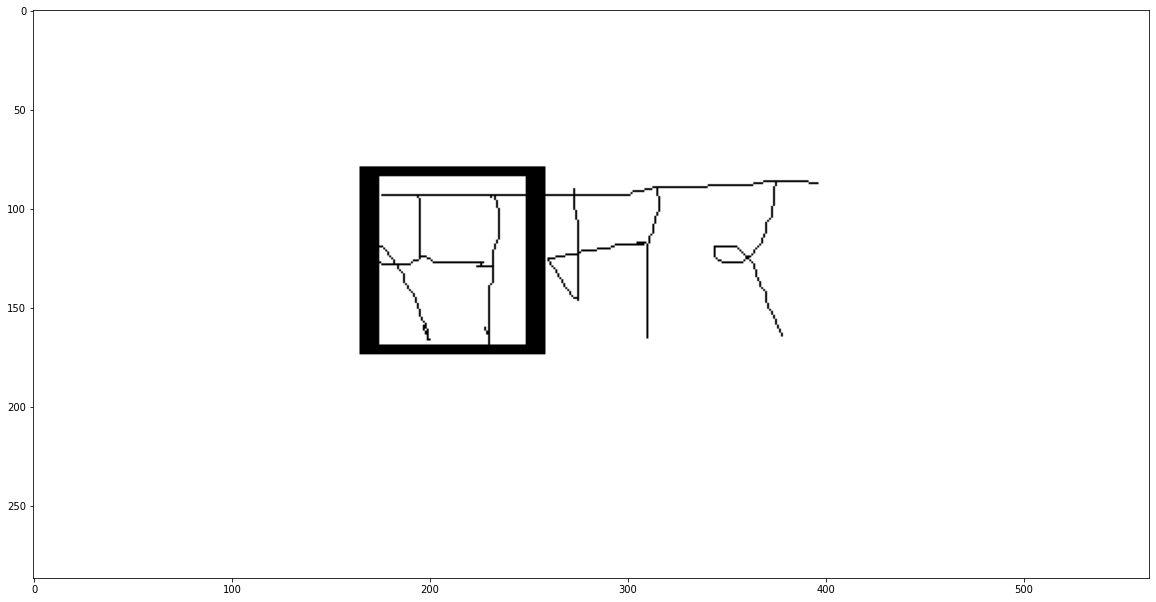

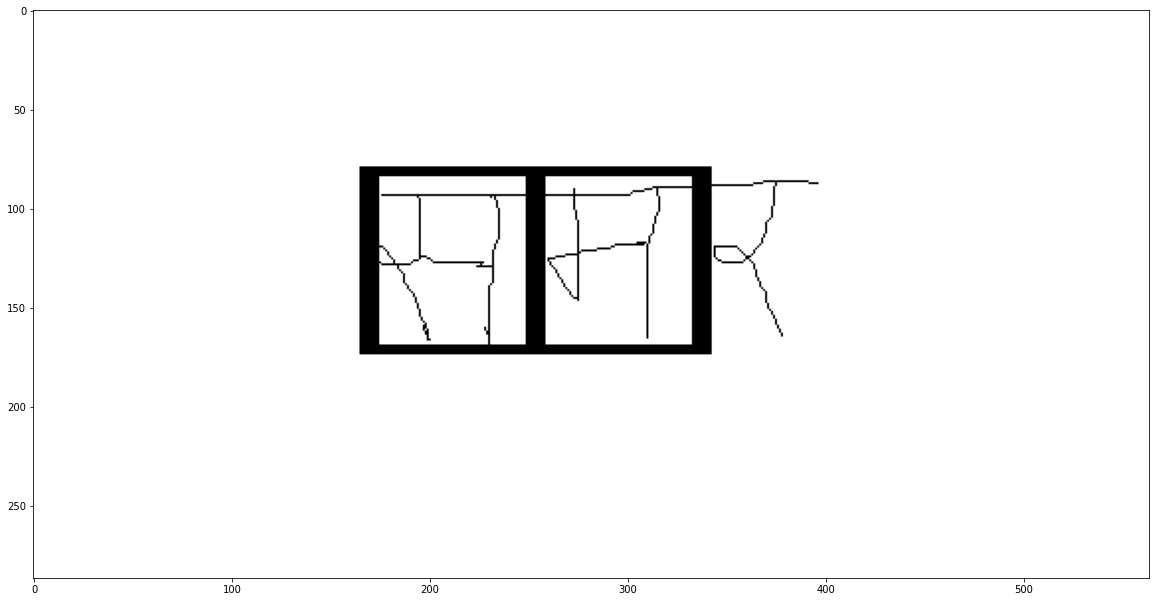

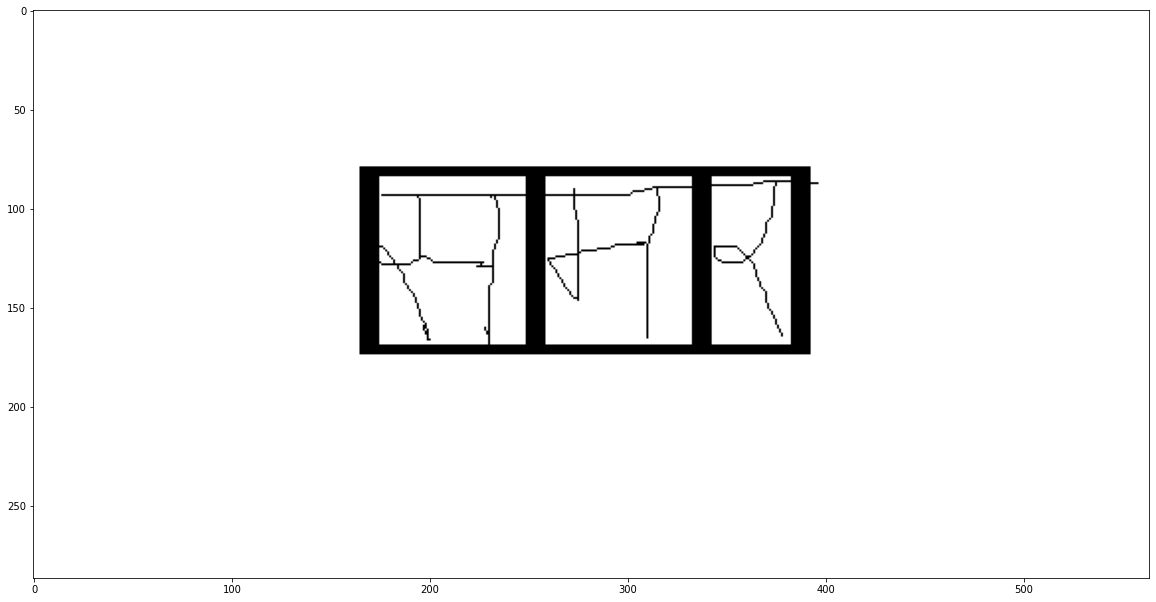

[(79, 174, 170, 254), (79, 174, 254, 338), (79, 174, 338, 388)]


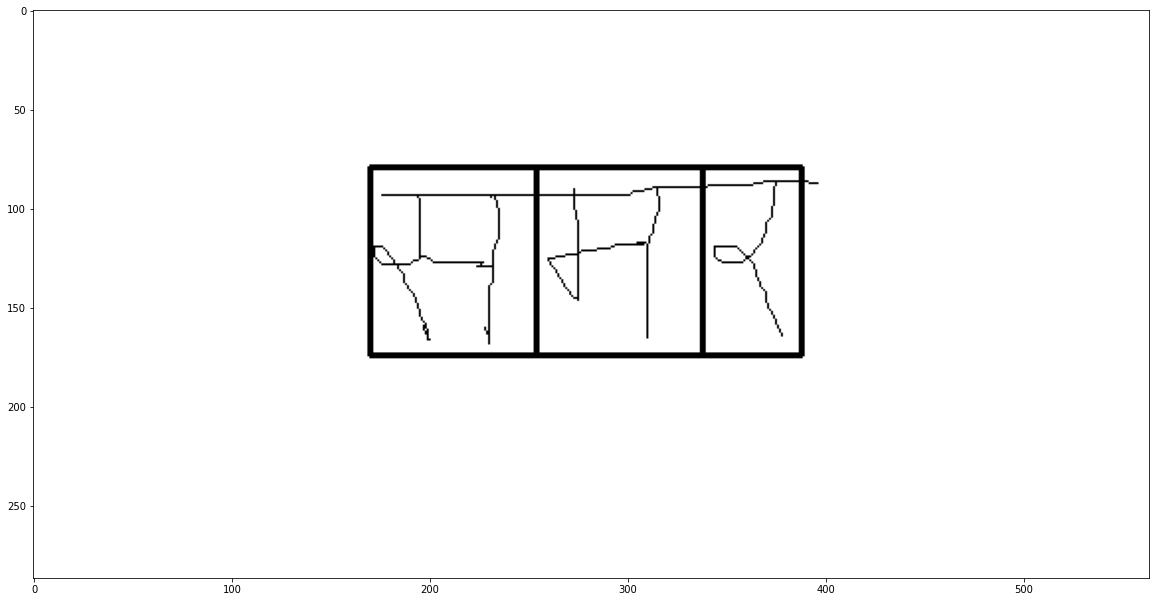

In [ ]:
def localize(orig_img, tb, lr, segments):
    d=5
    rimg = orig_img.copy()
    boxes = []
    for simg, bb in zip(segments[0], segments[1]):
        bb = np.array(bb)
        bb += lr[0]
        # draw rows
        rimg[tb[0]-d:tb[0], bb[0]-d:bb[1]+d] = 0
        rimg[tb[1]:tb[1]+d, bb[0]-d:bb[1]+d] = 0

        # draw cols
        rimg[tb[0]-d:tb[1]+d, bb[0]-d:bb[0]+d] = 0
        rimg[tb[0]-d:tb[1]+d, bb[1]-d:bb[1]+d] = 0
        
        boxes.append((tb[0]-d, tb[1]+d, bb[0], bb[1]))
        show(rimg)
    rimg = img.copy()
    print(boxes)
    for box in boxes:
        t, b, l, r = box
        cv2.rectangle(rimg, (l, t), (r, b), (0, 0, 0), 2)
    show(rimg)    
    return rimg, boxes
localized = localize(img, tb, lr, segments)

In [ ]:
import predictor
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

def prediction(img):
    # load json and create model
    json_file = open('/content/cnn1.json', 'r')
    
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    # load weights into new model
    loaded_model.load_weights("/content/cnn1.h5")
    print("Loaded model from disk")
    
    loaded_model.save('/content/cnn1.hdf5')
    loaded_model=load_model('/content/cnn1.hdf5')
    
    characters = '०,१,२,३,४,५,६,७,८,९,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ'
    characters = characters.split(',')
    
    x = np.asarray(img, dtype = np.float32).reshape(1, 32, 32, 1) / 255 
    
    output = loaded_model.predict(x)
    output = output.reshape(46)
    predicted = np.argmax(output)
    devanagari_label = characters[predicted]
    success = output[predicted] * 100
    
    return devanagari_label, success

In [ ]:
def classifier(segments):
    pred_lbl = ""
    acc = []
    for segment in segments:
        segment = cv2.resize(segment, (32, 32))
        segment = cv2.GaussianBlur(segment, (3, 3), 0)
        segment = cv2.erode(segment, (3, 3), 1)
        #show(segment)
        
        lbl, a = prediction(segment)
        pred_lbl+=lbl
        acc.append(a)
    return pred_lbl, np.array(acc).mean()
classifier(segments[0])

Loaded model from disk
Loaded model from disk
Loaded model from disk


('समर', 81.4973533153534)

In [ ]:
!ls /content/drive/My\ Drive/recognition.py

'/content/drive/My Drive/recognition.py'


In [ ]:
!cat '/content/drive/My Drive/recognition.py'

# -*- coding: utf-8 -*-
"""
Created on Thu Apr 11 13:50:41 2019

@author: Quassarian Viper
"""
from preprocess import preprocess, detect_text, localize
from predictor import prediction
import numpy as np
import matplotlib.pyplot as plt
import cv2

def recognition(gray_image, show):
    segments, template, th_img, text_color = preprocess(gray_image)
    labels = []
    accuracy = []
    show_img = gray_image[:]
    #print(len(segments))
    
    for segment in segments: 
        #plt.imshow(segment)
        #plt.show()
        recimg, bimg = detect_text(show_img, th_img, segment, text_color)
        #print('Process: Recognition....\n')
        label, sure = prediction(bimg)
        if(sure > 80):
            #print(segment)
            labels.append(str(label))
            accuracy.append(sure)
            show_img = localize(show_img, th_img, segment, text_color, show)
        char = labels
    accuracy = np.average(accuracy)
    char = ''.join(char)
    if accuracy < 80:
        recim

In [ ]:
from preprocess import preprocess, detect_text, localize
from predictor import prediction
import numpy as np
import matplotlib.pyplot as plt
import cv2

def recognition(gray_image, show):
    segments, template, th_img, text_color = preprocess(gray_image)
    labels = []
    accuracy = []
    show_img = gray_image[:]
    #print(len(segments))
    
    for segment in segments: 
        #plt.imshow(segment)
        #plt.show()
        recimg, bimg = detect_text(show_img, th_img, segment, text_color)
        #print('Process: Recognition....\n')
        label, sure = prediction(bimg)
        if(sure > 80):
            #print(segment)
            labels.append(str(label))
            accuracy.append(sure)
            show_img = localize(show_img, th_img, segment, text_color, show)
        char = labels
    accuracy = np.average(accuracy)
    char = ''.join(char)
    if accuracy < 80:
        recimg, bimg = detect_text(show_img, th_img, template, text_color)
        show_img = localize(show_img, th_img, template, text_color, show)
        char, accuracy = prediction(bimg)
        
    if (show == 'show'):
        plt.imshow(show_img)
        plt.title('Detecting')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        cv2.imshow('Detecting..', cv2.cvtColor(show_img, cv2.COLOR_GRAY2BGR))
    
    print('The prediction accuracy for ', char,' is ',"%.2f" % round(accuracy,2), '%')
    
    #plt.imshow(cv2.cvtColor(show_img, cv2.COLOR_GRAY2RGB))
    #plt.show()

In [ ]:
 import cv2
#from recognition import recognition
import numpy as np
import time
import matplotlib.pyplot as plt

def camera(flag):
   # choice = print("Click spacebar for photo and anything else for video.\n")
    orig = 1
    cap = cv2.VideoCapture(0)
    tr = 0.1
    br = 0.8
    lc = 0.1
    rc = 0.8
    f = 0
    
    while(flag):    
        ret, frame = cap.read()
        if ret:
            #key event
            s = cv2.waitKey(2) & 0xFF
            
            if(chr(s) == 'x'):
                f = -1
            if(chr(s) == 'z'):
                f = 1
            
            if(chr(s) == 'a'):
                tr = tr + 0.1 * f
            if(chr(s) == 'd'):
                br = br + 0.1 * f
            if (chr(s) == 's'):
                lc = lc + 0.1 * f
            if (chr(s) == 'w'):
                rc = rc + 0.1 * f
                
                
            s_x, s_y = np.shape(frame)[0] * tr, np.shape(frame)[1] * lc
            e_x, e_y = np.shape(frame)[1] * br, np.shape(frame)[0] * rc
            s_x, s_y = np.int32(s_x), np.int32(s_y)
            e_x, e_y = np.int32(e_x), np.int32(e_y)

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            ogray = gray[:]
            gray = gray[s_y:e_y, s_x:e_x]
            #original = frame[s_y:e_y, s_x:e_x]
            
            if (s == 32): #space to capture image and do recognition
                time1 = time.time()
                plt.imshow(frame)
                plt.show()
                recognition(gray, 'show')
                print("In %f" %(time.time()-time1), 'sec')
            if (s == 13): #enter to do realtime recognition
                orig = 0
                cv2.destroyWindow('Project DCR')
                print("Doing RT...")
                recognition(ogray, 'no')
           
            
            else:
                if(orig != 0):
                    show = frame[:]
                    text = "Press 'space' to take a photo and 'enter' to do realtime(slow)."
                    text1 = "Make sure the character is inside rectangle."
                    text2 = "Press a/s/d/w for change size of rectangle and z/x to increase/decrease."
                    cv2.putText(show, text1, (15, 50), cv2.FONT_HERSHEY_COMPLEX, 0.75, (0, 100, 200))
                    cv2.putText(show, text2, (15, 70), cv2.FONT_HERSHEY_COMPLEX, 0.5, (50, 20, 255))
                    cv2.rectangle(show, (s_x, s_y), (e_x, e_y), (0, 255, 0), 2)
                    cv2.putText(show, text, (15, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (15, 0, 255), lineType=cv2.LINE_AA) 
                    cv2.imshow('Project DCR', show)
        
        else:
            print('Trying.....\n')
            continue
         
         
        if s == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
!ls /content/drive/My\ Drive/main.py

'/content/drive/My Drive/main.py'


In [ ]:
!ls /content/drive/My\ Drive/video_test.py

'/content/drive/My Drive/video_test.py'
